<a href="https://colab.research.google.com/github/zwadhams/DataMiningStuff/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members: Zach Wadhams, Kruize Christensen, Lauren Helbling

Data Set Used: https://www.kaggle.com/datasets/leonardopena/top50spotify2019

# Problem 4.1

##Summary / Plan

For our final project, we were curious what makes a song popular on Spotify. We selected the Top 50 Spotify Songs for 2019 dataset from Kaggle. This data set consists of 50 songs, each with 13 variables. The categorical variables are song name, artist name, and genre. The quantitative variables are beats per minute, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness, and popularity. Some of the data mining techniques we plan on using include:

Correlation: A primary focus of this problem is analyzing the correlation between popularity and all of the variables in the data set. Also, we could explore the correlation between variables, such as loudness and energy.
Label-encoding: The genre variable could be label encoded in order to better analyze it.

Label-encoding: The genre variable could be label encoded in order to better analyze it.
Dimension Reduction & PCA: The 10 quantitative variables could be reduced, while maintaining meaning, in order to visualize the data.

Dimension Reduction & PCA: The 10 quantitative variables could be reduced, while maintaining meaning, in order to visualize the data.
Clustering: This would determine what particular song would be grouped together in each category. This could be using K-means or using other techniques from the course.

Data Visualization: Creating informative plots and graphs to help a broad audience to understand the data

If we run out of time, clustering techniques would be the most likely one we would have to work on for another day. Another idea that we could pursue if given the time is developing a Spotify popularity prediction algorithm with the current data.



#Problem 4.2

#Implementation



Reading In Data:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
import os

filename='top50.csv'
spoti=pd.read_csv(filename,encoding='ISO-8859-1') 
spoti.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


##PRE-PROCESSING



Drop uninformative column and forward fill NA values

In [ ]:
spoti = spoti.drop(columns = ['Unnamed: 0'])
spoti.isnull().sum()
spoti.fillna(method="ffill")
spoti.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Rename attributes

In [ ]:
spoti.rename(columns={'Track.Name':'Track_name','Artist.Name':'Artist_name','Beats.Per.Minute':'Tempo','Loudness..dB..':'Loudness','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
spoti.columns

Index(['Track_name', 'Artist_name', 'Genre', 'Tempo', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

Create subset of data without track name,artist name, and genre attributes

In [ ]:
spoti_sub = spoti.drop(columns = ['Track_name', 'Artist_name', 'Genre'])

Standard Score Normalize all values

In [ ]:
spoti_norm = spoti_sub.copy()
for column in spoti_norm.columns:
    spoti_norm[column] = (spoti_norm[column] - spoti_norm[column].mean()) / spoti_norm[column].std()

In [ ]:
spoti_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Tempo,50.0,-9.992007e-17,1.0,-1.134687,-0.778681,-0.503586,0.564431,2.263548
Energy,50.0,-1.554312e-16,1.0,-2.252684,-0.619031,0.171446,0.751129,1.682135
Danceability,50.0,3.952394e-16,1.0,-3.552425,-0.367145,0.177705,0.701600,1.560787
Loudness,50.0,7.660539e-17,1.0,-2.596710,-0.530040,-0.165334,0.807217,1.779768
Liveness,50.0,4.440892e-18,1.0,-0.868837,-0.599012,-0.329187,0.098037,3.898076
Valence,50.0,-3.108624e-17,1.0,-1.996774,-0.732001,0.040294,0.667084,1.808737
Length,50.0,-2.126077e-16,1.0,-2.196001,-0.618488,-0.075618,0.422544,2.760074
Acousticness,50.0,3.178013e-17,1.0,-1.113945,-0.732277,-0.376930,0.610143,2.781704
Speechiness,50.0,-5.467848e-17,1.0,-0.849341,-0.670155,-0.490969,0.225774,3.003155
Popularity,50.0,-3.108624e-17,1.0,-3.896258,-0.333965,0.111322,0.723591,1.669825


##DATA MINING TECHNIQUES



Text(0, 0.5, 'f(r) : fraction of total variance preserved')

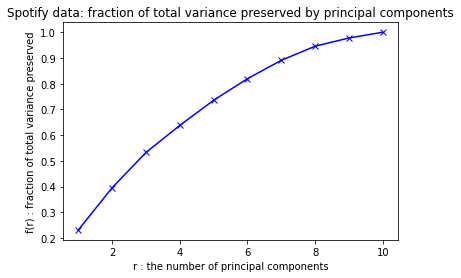

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spoti_norm)
var_ratio = pca.explained_variance_ratio_
plt.plot(range(1,len(var_ratio)+1), np.cumsum(var_ratio), marker='x', color=('blue'))
plt.title('Spotify data: fraction of total variance preserved by principal components')
plt.xlabel('r : the number of principal components')
plt.ylabel('f(r) : fraction of total variance preserved')

We see that r=6 preserves atleast 80% of total variance, which we will use further in our analysis

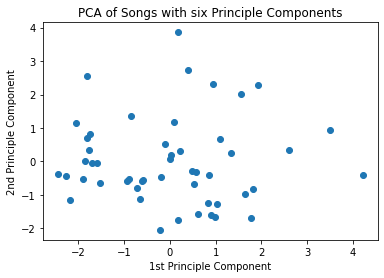

In [ ]:
pca = PCA(6)
pca.fit(spoti_norm)
reduced = pca.transform(spoti_norm)
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("PCA of Songs with six Principle Components")
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.show()

K-Means clustering:

[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster Size')]

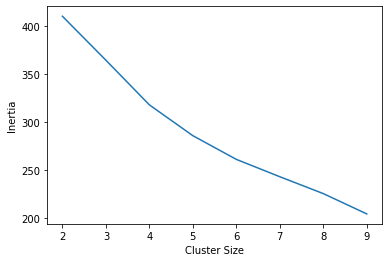

In [ ]:
from sklearn.cluster import KMeans
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(spoti_norm)
    preds = kmeans_model.predict(spoti_norm)
    score_list.append(kmeans_model.inertia_)
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

A cluster size of 5 marks a small elbow

In [ ]:
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=3).fit(spoti_norm)
preds = kmeans_model.predict(spoti_norm)

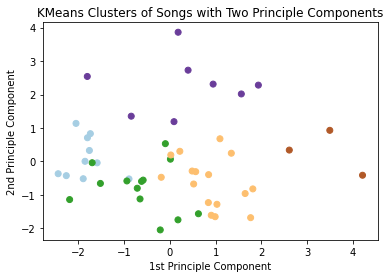

In [ ]:
plt.scatter(reduced[:,0], reduced[:,1], c=preds, cmap=plt.cm.Paired)
plt.title("KMeans Clusters of Songs with Two Principle Components")
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.show()

In [ ]:
spoti_norm['cluster'] = preds
cluster_means = spoti_norm.groupby('cluster').agg('mean')
cluster_means

,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
cluster,,,,,,,,,,
0,-0.584496,1.007595,0.060353,0.807217,1.262782,0.465616,0.721441,-0.361137,-0.446173,0.244908
1,-0.474956,0.152528,0.696764,0.171319,-0.446803,0.768679,-0.403796,0.270995,-0.325567,-0.864884
2,-0.254787,-0.632206,-0.435252,-0.469256,-0.228002,-0.846726,-0.214529,-0.054486,-0.423775,0.166983
3,1.810450,0.391023,-0.346190,0.624864,-0.250488,-0.099615,0.294810,-0.212418,1.222495,0.473117
4,0.537461,-1.690567,0.024029,-2.596710,-0.389148,-0.101480,-0.297024,0.886523,1.898175,0.779252


Match songs with clusters

In [ ]:
songs = [x for x in spoti['Track_name']]
artists = [x for x in spoti['Artist_name']]
genres = [x for x in spoti['Genre']]
clusters = dict([(key, []) for key in range(n_clusters)])
for i,cluster in enumerate(preds):
  clusters[cluster].append((songs[i],artists[i],genres[i]))

##DATA VISUALIZATION

Find standard deviations for each category

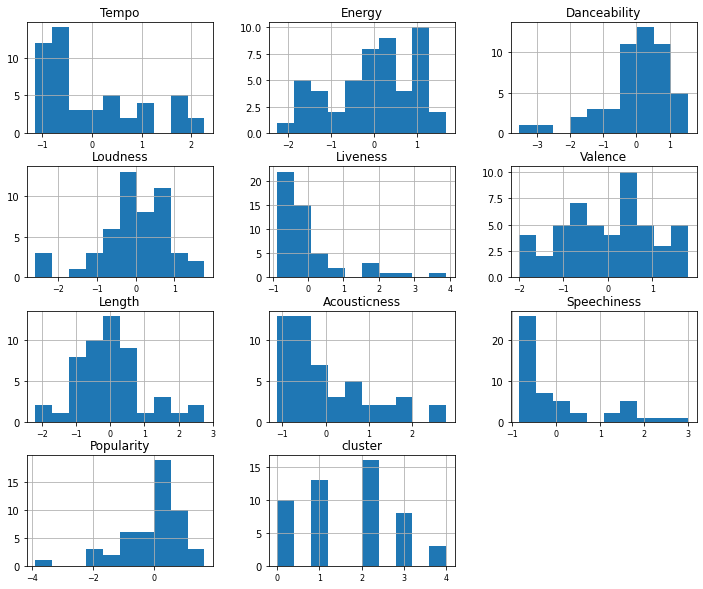

In [ ]:
spoti_norm.hist(xlabelsize=8, figsize=(12,10))
plt.show()

Popular Songs -> Low tempo and high dancability

Auto-generate playlist titles for each cluster

In [ ]:
loudness_names = ['quiet', 'loud']
tempo_names = ['slow jams','bops']
speechiness_names = ['to study to', 'to sing along to']
for i in range(n_clusters) :
  tempo, speech, loudness = cluster_means.loc[i, 'Tempo'], cluster_means.loc[i, 'Speechiness'], cluster_means.loc[i, 'Loudness']
  print((loudness_names[0] if loudness<0 else loudness_names[1]), \
        (tempo_names[0] if tempo<0 else tempo_names[1]), \
        (speechiness_names[0] if speech<0 else speechiness_names[1]), ': ')
  for song in clusters[i]:
    print(" ", song[0], 'by', song[1], "(",song[2], ")")

loud slow jams to study to : 
  China by Anuel AA ( reggaeton flow )
  No Me Conoce - Remix by Jhay Cortez ( reggaeton flow )
  Soltera - Remix by Lunay ( latin )
  Con Calma by Daddy Yankee ( latin )
  QUE PRETENDES by J Balvin ( latin )
  Never Really Over by Katy Perry ( dance pop )
  Antisocial (with Travis Scott) by Ed Sheeran ( pop )
  One Thing Right by Marshmello ( brostep )
  Happier by Marshmello ( brostep )
  Call You Mine by The Chainsmokers ( edm )
loud slow jams to study to : 
  Señorita by Shawn Mendes ( canadian pop )
  I Don't Care (with Justin Bieber) by Ed Sheeran ( pop )
  Old Town Road - Remix by Lil Nas X ( country rap )
  Loco Contigo (feat. J. Balvin & Tyga) by DJ Snake ( dance pop )
  Sunflower - Spider-Man: Into the Spider-Verse by Post Malone ( dfw rap )
  If I Can't Have You by Shawn Mendes ( canadian pop )
  Dance Monkey by Tones and I ( australian pop )
  0.958333333333333 by Maluma ( reggaeton )
  Sucker by Jonas Brothers ( boy band )
  fuck, i'm lonely (

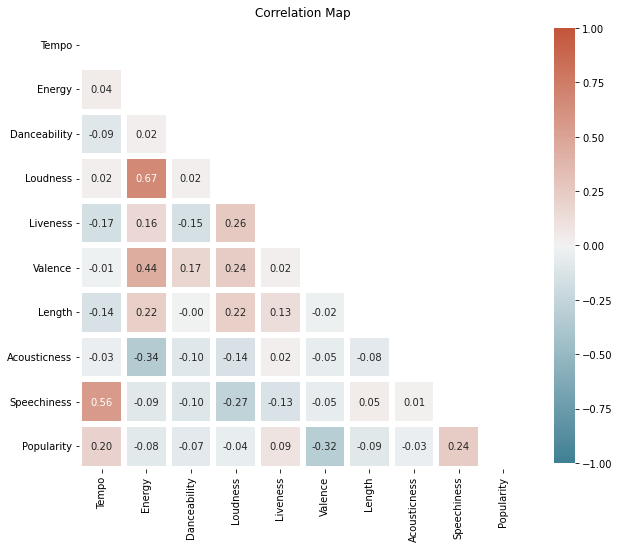

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
corr = spoti.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)

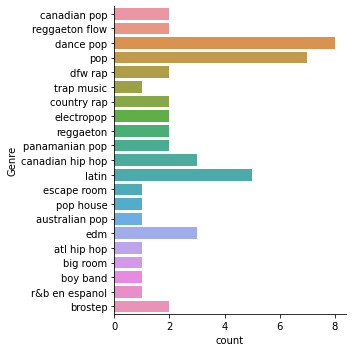

In [ ]:
sns.catplot(y = "Genre", kind = "count", data = spoti)